In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:

import elastic
import potentials
import constants
import spinexchange
import dipolelosses
import numpy as np
import pylab as plt
from dipolelosses import DipoleChannels



In [3]:

r0       = 1e-9
pin      = 1e-4
intlimit = 100 * constants.BohrInAng/constants.hcInEVAngstrom
rhos = np.linspace(r0, intlimit, 100)


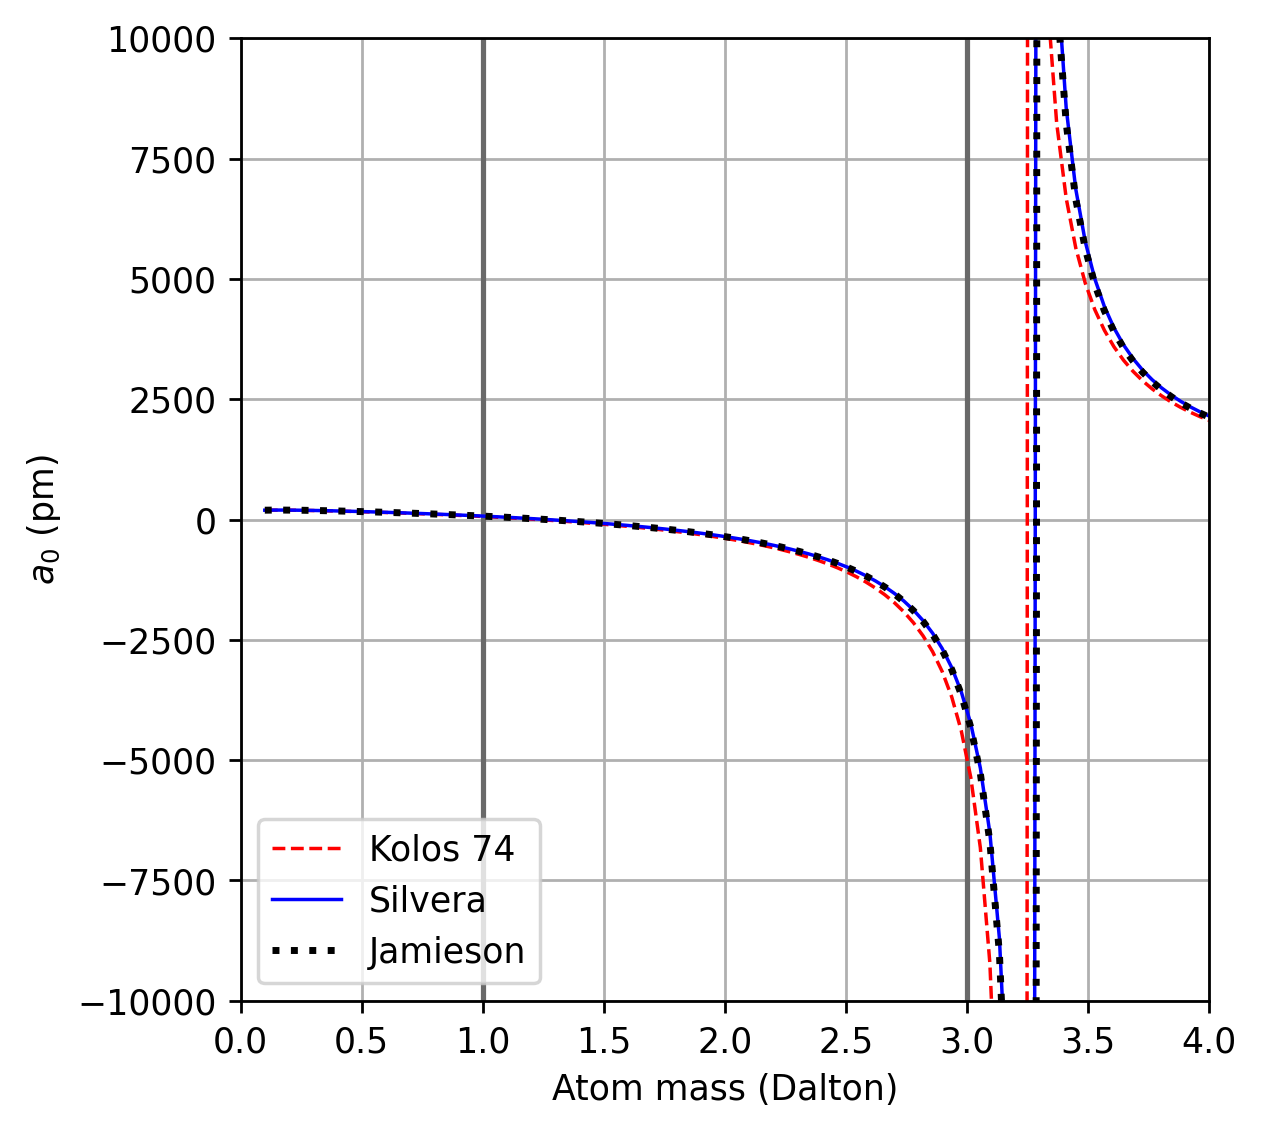

In [4]:
colors=['red','blue','black']
LineStyles=['--','-',':']
linewidths=[1,1,2]
ms=np.linspace(0.1,4,100)
plt.figure(figsize=(5,5),dpi=250)
i=0
plt.plot([1,1],[-100000,45000],'-',color='dimgrey')
plt.plot([3,3],[-100000,45000],'-',color='dimgrey')
for trip in potentials.TripletsH.keys():
    aVsM=[]

    for m in ms:
        # We need to adiabatically correct each potential. Remove H correction (-1) then add (1/m) scaled one.
        def AdCorrectedPotential(R):
            return(potentials.ApplyCorrection(R, potentials.TripletsH[trip], potentials.TripletCorrection, (-1+1/m)))

        # get the reduced mass for each mass
        mu=m*constants.DaltonInEV/2

        #Find the scattering length
        aVsM.append(elastic.GetScatteringLength(rhos, pin, 0, mu, AdCorrectedPotential, 'Radau')[-1]*constants.hcInEVAngstrom*100)
    plt.plot(ms,aVsM,label=trip,color=colors[i],linestyle=LineStyles[i],linewidth=linewidths[i])
    i=i+1

plt.xlabel("Atom mass (Dalton)")
plt.ylabel(r"$a_0$ (pm)")

plt.ylim(-10000,10000)
plt.xlim(0,4)
plt.grid(which='both')
plt.legend(loc='lower left')

In [5]:
print("Potential, With ad correction, no ad correction, ratio")
print()
print("Tritium:")
for trip in potentials.Triplets.keys():
    mu=m*constants.DaltonInEV/2
    withad=elastic.GetScatteringLength(rhos, pin, 0, constants.TritiumConstants.mu, potentials.TripletsT[trip], 'Radau')[-1]*constants.hcInEVAngstrom*100
    noad=elastic.GetScatteringLength(rhos, pin, 0, constants.TritiumConstants.mu, potentials.Triplets[trip], 'Radau')[-1]*constants.hcInEVAngstrom*100

    print(trip, withad,noad, withad/noad)
print()
print("Hydrogen:")
for trip in potentials.Triplets.keys():
    mu=m*constants.DaltonInEV/2
    withad=elastic.GetScatteringLength(rhos, pin, 0, constants.HydrogenConstants.mu, potentials.TripletsT[trip], 'Radau')[-1]*constants.hcInEVAngstrom*100
    noad=elastic.GetScatteringLength(rhos, pin, 0, constants.HydrogenConstants.mu, potentials.Triplets[trip], 'Radau')[-1]*constants.hcInEVAngstrom*100
    print(trip, withad,noad, withad/noad)



Potential, With ad correction, no ad correction, ratio

Tritium:
Kolos 74 -5390.929370026321 -5273.014316978928 1.0223619823423786
Silvera -4262.948801998648 -4184.923693386094 1.0186443324488488
Jamieson -4339.53709632014 -4505.106465366852 0.9632485113682593

Hydrogen:
Kolos 74 62.52344900109923 62.90960118042587 0.9938617926027039
Silvera 70.95839922189333 71.32577773182905 0.9948492884113092
Jamieson 70.45604244967204 69.78564478590582 1.0096065267552221


/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:66: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/spinbasis.py:283: RuntimeWarning: divide by zero encountered in matmul
  Rets[m]=TransformMatrix(np.matmul(np.matmul(TripletProj,SigMatrix),TripletProj),Rotator)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/spinbasis.py:283: RuntimeWarning: overflow encountered in matmul
  Ret

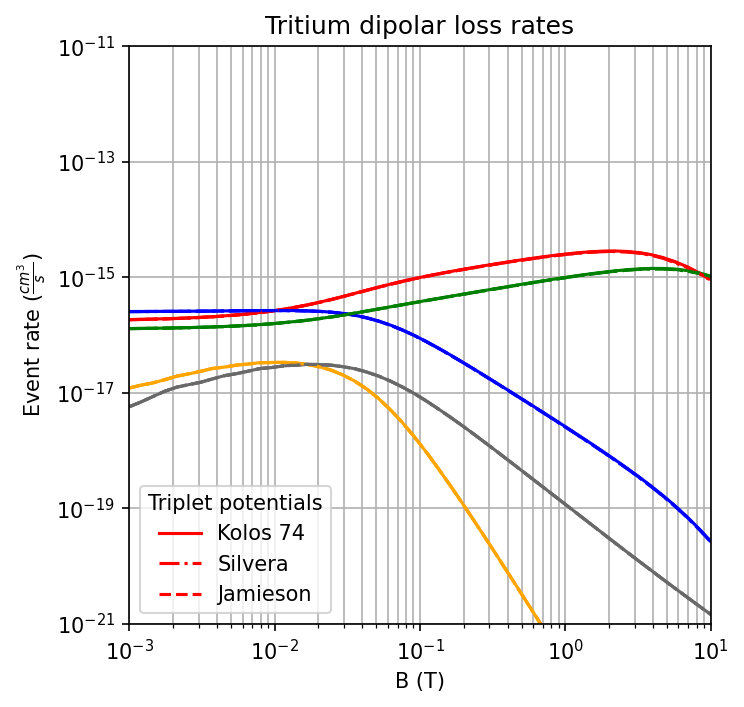

In [6]:
B_values = np.logspace(-3,1,50)
pot      = potentials.Silvera_Triplet
T        = 5e-4

colors=['red','blue','green','orange','dimgrey']
linetypes=['-','-.','--',':']
plt.figure(figsize=(5,5),dpi=150)

pi=0
for pot in potentials.Triplets.keys():
    TripletPotential=potentials.Triplets[pot]
    ci=0
    for c in DipoleChannels:
        LossesT=[]
        for B in B_values:
            LossesT.append(dipolelosses.GetGFactor(c,  B, constants.HydrogenConstants(), T, potentials.Triplets[pot],rhos=np.linspace(1e-9,0.75,2000)))
        if(ci==0):
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci],label=pot)
        else:
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci])
        ci=ci+1
    pi=pi+1
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.ylim(1e-21, 1e-11)
plt.title("Tritium dipolar loss rates")
plt.grid(which='both')
plt.legend(loc='lower left',title='Triplet potentials')
plt.loglog()

plt.show()

In [7]:
B_values = np.logspace(-3,1,50)
SingletPotential     = potentials.Kolos_Singlet2_VDW
T        = 1e-5
Channels = [ ['a','a'],
             ['a','c'],
             ['b','d']]
colors=['red','blue','green']
linetypes=['-','-.','--',':']

plt.figure(figsize=(5,5),dpi=150)

pi=0
for pot in potentials.Triplets.keys():
    TripletPotential=potentials.Triplets[pot]
    ci=0
    for c in Channels:

        LossesT=spinexchange.GetGFactor(alpha='c',beta='c',alphaprime=c[0],betaprime=c[1],which='T', B_values=B_values,triplet_potential=TripletPotential,singlet_potential=SingletPotential,temp=T)
        if(ci==0):
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci],label=pot)
        else:
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci])
        ci=ci+1
    pi=pi+1
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.title("Tritium Spin Exchange rates")
plt.grid(which='both')
plt.legend(loc='lower left',title='Triplet potentials')
plt.loglog()
plt.show()

TypeError: GetGFactor() got an unexpected keyword argument 'alpha'

<Figure size 750x750 with 0 Axes>

In [7]:
B_values = np.logspace(-3,1,50)
TripletPotential  = potentials.Silvera_Triplet

T        = 1e-5
Channels = [ ['a','a'],
             ['a','c'],
             ['b','d']]
colors=['red','blue','green']
linetypes=['-','-.','--',':']

plt.figure(figsize=(5,5),dpi=150)

pi=0
for pot in potentials.Singlets.keys():
    SingletPotential=potentials.Singlets[pot]
    ci=0
    for c in Channels:
        LossesT=spinexchange.GetGFactor(alpha='c',beta='c',alphaprime=c[0],betaprime=c[1],which='T', B_values=B_values,triplet_potential=TripletPotential,singlet_potential=SingletPotential,temp=T)
        if(ci==0):
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci],label=pot)
        else:
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci])
        ci=ci+1
    pi=pi+1
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.title("Tritium Spin exchange loss rates")
plt.grid(which='both')
plt.legend(loc='lower left', title='Singlet potentials')
plt.loglog()
plt.show()

TypeError: GetGFactor() got an unexpected keyword argument 'alpha'

<Figure size 750x750 with 0 Axes>